In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [75]:


# Define start and end dates
start = '2014-01-01'
end = '2023-12-31'

# Fetch data using yfinance
df = yf.download('AAPL', start, end)

# Display the first few rows of the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253256,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874277,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966290,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844954,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951633,258529600


In [77]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848206,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,191.802185,42628800


In [78]:
df =df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253256,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874277,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966290,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844954,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951633,258529600


In [79]:
df = df.drop(['Date','Adj Close'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600


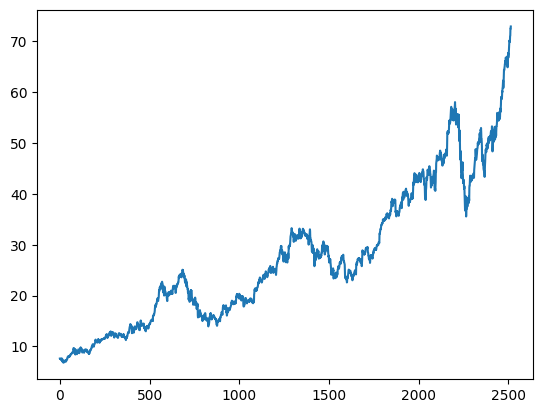

In [21]:
plt.plot(df.Close)


In [80]:
df

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600
...,...,...,...,...,...
2511,195.179993,195.410004,192.970001,193.600006,37122800
2512,193.610001,193.889999,192.830002,193.050003,28919300
2513,192.490005,193.500000,191.089996,193.149994,48087700
2514,194.139999,194.660004,193.169998,193.580002,34049900


In [81]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    181.768301
2512    181.787101
2513    181.898701
2514    182.046001
2515    182.173301
Name: Close, Length: 2516, dtype: float64

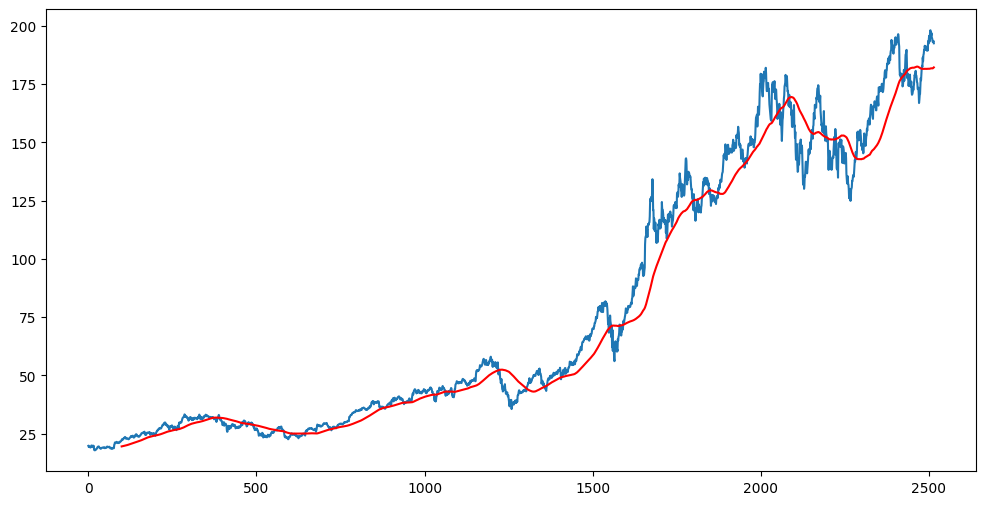

In [82]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [83]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    178.649100
2512    178.871851
2513    179.085250
2514    179.290201
2515    179.487900
Name: Close, Length: 2516, dtype: float64

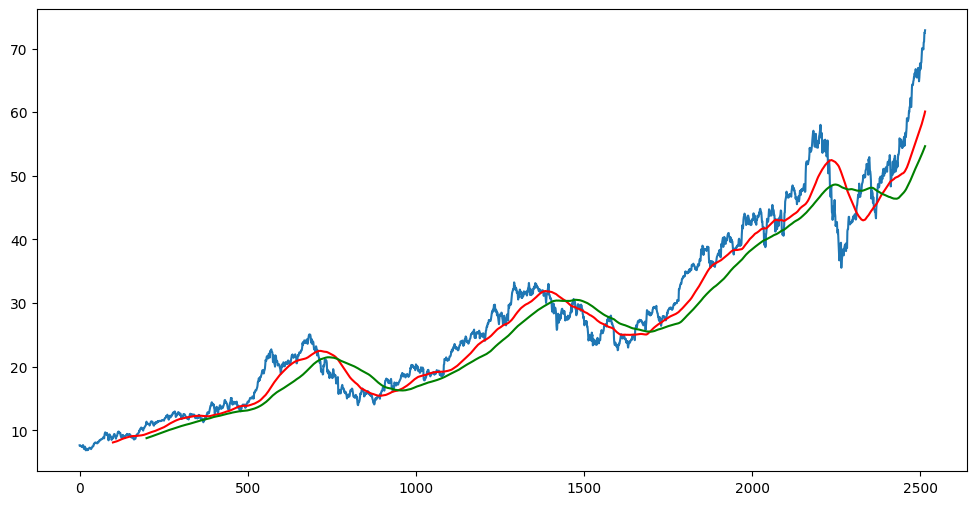

In [26]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [84]:
df.shape

(2516, 5)

In [85]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [86]:
data_training.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [87]:
data_testing.head()

,Close
1761,133.720001
1762,132.690002
1763,129.410004
1764,131.009995
1765,126.599998


In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [89]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01603287],
       [0.01238153],
       [0.01326806],
       ...,
       [0.96028296],
       [1.        ],
       [0.98468532]])

In [90]:
data_training_array.shape

(1761, 1)

In [91]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
     x_train.append(data_training_array[i-100: i])
     y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [92]:
x_train.shape

(1661, 100, 1)

In [93]:
#Machine Learning Model


In [94]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [98]:
# Define the model
model = Sequential()

# First LSTM layer with input shape (timesteps, features)
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

In [113]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - loss: 0.0472
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0134
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0047
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0037
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0040
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0039
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0027
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0027
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0028
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0032
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0024
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0028
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0026
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0029
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.

In [129]:
model.save('my_model.keras')

In [130]:
data_testing.head()

,Close
1761,133.720001
1762,132.690002
1763,129.410004
1764,131.009995
1765,126.599998


In [131]:
data_training.tail(100)

,Close
1661,111.112503
1662,112.727501
1663,109.375000
1664,113.010002
1665,115.010002
...,...
1756,131.880005
1757,130.960007
1758,131.970001
1759,136.690002


In [132]:
past_100_days = data_training.tail(100)

In [133]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [134]:
final_df.head()

,Close
0,111.112503
1,112.727501
2,109.375000
3,113.010002
4,115.010002


In [135]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.04681173],
       [0.06450646],
       [0.02777477],
       [0.06760168],
       [0.08951469],
       [0.08839163],
       [0.08510465],
       [0.09556813],
       [0.09715679],
       [0.12528766],
       [0.19206755],
       [0.2083653 ],
       [0.1970527 ],
       [0.21565138],
       [0.19907971],
       [0.19686102],
       [0.24323431],
       [0.29955073],
       [0.26909167],
       [0.1538293 ],
       [0.15470584],
       [0.06551992],
       [0.11482418],
       [0.07286076],
       [0.05653559],
       [0.09334945],
       [0.09532162],
       [0.05795991],
       [0.03834776],
       [0.        ],
       [0.03549913],
       [0.05445383],
       [0.00306789],
       [0.01512003],
       [0.0596034 ],
       [0.08896683],
       [0.07943464],
       [0.09827984],
       [0.10901725],
       [0.06771119],
       [0.10583985],
       [0.06924517],
       [0.09028164],
       [0.08907642],
       [0.11098942],
       [0.19239623],
       [0.15623974],
       [0.157

In [136]:
input_data.shape

(855, 1)

In [137]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [138]:
x_test, y_test =np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [139]:
#Makin Predictions
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [140]:
y_predicted.shape

(755, 1)

In [141]:
y_test

array([0.29451083, 0.28322565, 0.24728833, 0.26481864, 0.21650051,
       0.26383259, 0.27621349, 0.24257695, 0.24060486, 0.26350391,
       0.24181008, 0.22241703, 0.22997704, 0.27599432, 0.32902375,
       0.35312819, 0.39531062, 0.39794024, 0.38588802, 0.33143419,
       0.27522745, 0.29911254, 0.30842564, 0.29692128, 0.33472117,
       0.32781852, 0.3294621 , 0.31960115, 0.31280817, 0.30995954,
       0.31258899, 0.2887039 , 0.26295605, 0.25057532, 0.25232823,
       0.20992662, 0.20839272, 0.20280488, 0.15503452, 0.15799282,
       0.22953877, 0.20028493, 0.16675798, 0.14561192, 0.15974582,
       0.10430595, 0.15613016, 0.14396852, 0.16566234, 0.15547279,
       0.18790403, 0.20521532, 0.19634058, 0.14999454, 0.14407802,
       0.18133014, 0.17201713, 0.14517365, 0.1506519 , 0.15744497,
       0.15941714, 0.14309198, 0.16774411, 0.17705712, 0.20883099,
       0.21222748, 0.23074399, 0.25769698, 0.28662214, 0.26733875,
       0.30228985, 0.27599432, 0.30305689, 0.29933172, 0.30678

In [64]:
y_predicted

array([[0.14297368],
       [0.14400797],
       [0.14491068],
       [0.14565043],
       [0.14621203],
       [0.14659949],
       [0.1468485 ],
       [0.14702195],
       [0.14718428],
       [0.14739053],
       [0.14767389],
       [0.14803879],
       [0.14848414],
       [0.14900649],
       [0.14958975],
       [0.15021275],
       [0.15085468],
       [0.15149304],
       [0.15213133],
       [0.15278962],
       [0.15348017],
       [0.15419346],
       [0.1549082 ],
       [0.15569623],
       [0.15667419],
       [0.15792733],
       [0.15951861],
       [0.16149168],
       [0.16386275],
       [0.1666158 ],
       [0.16969536],
       [0.17301823],
       [0.17654406],
       [0.18023565],
       [0.18404183],
       [0.18790403],
       [0.19177446],
       [0.19561438],
       [0.19937734],
       [0.2030159 ],
       [0.2064901 ],
       [0.20976743],
       [0.21286303],
       [0.21579406],
       [0.2185764 ],
       [0.22121337],
       [0.22370003],
       [0.226

In [142]:
scaler.scale_

array([0.0109565])

In [143]:
 scale_factor = 1/0.02123255
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

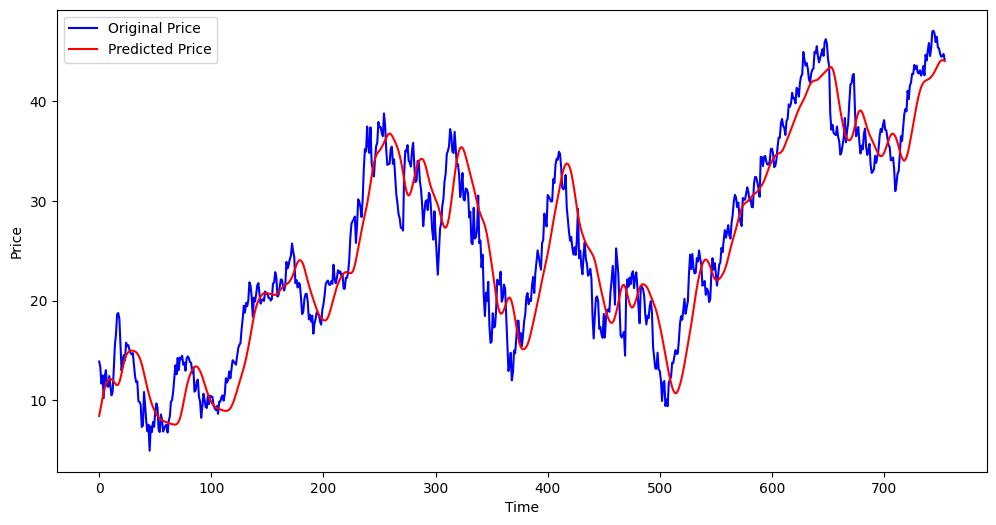

In [144]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()